In [2]:
import sys
sys.path.append('../')

from model import DecisionTree
from rule import RuleExtractor
import matplotlib.pyplot as plt

import os
import numpy as np
import warnings
import pandas as pd

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

In [3]:
# sage, srgnn 중 선택
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
data_path = "../data/"

pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embedding = np.load(os.path.join(data_path, filename[embed_model]))

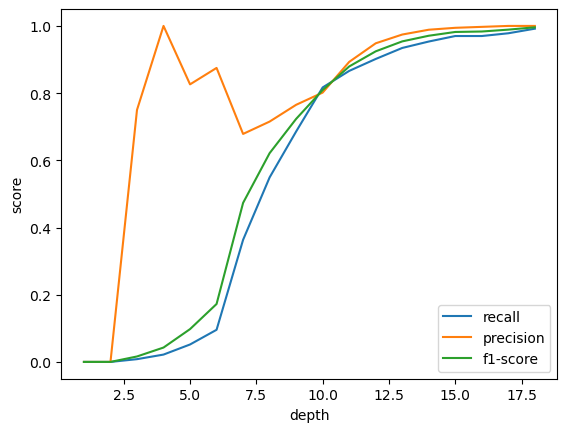

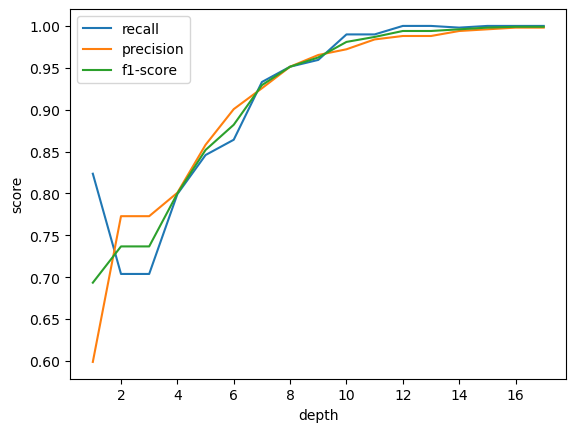

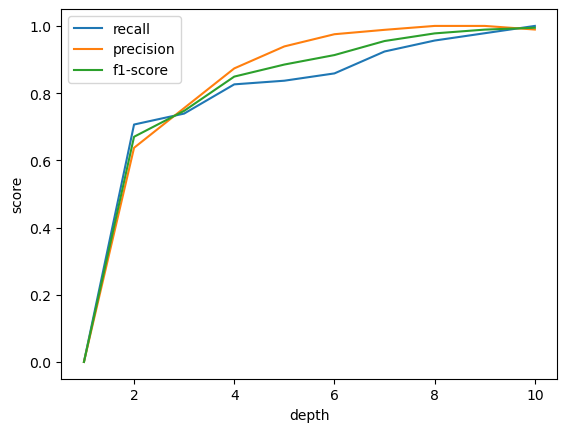

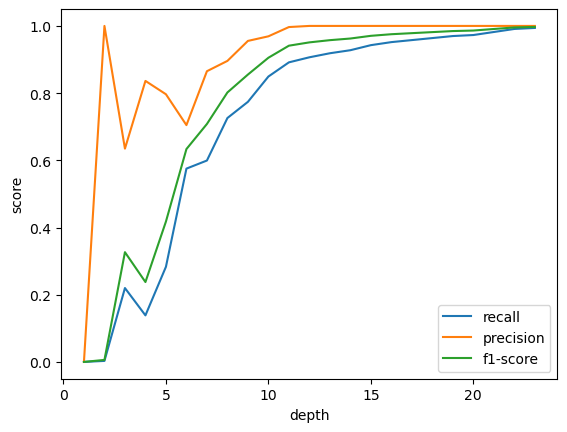

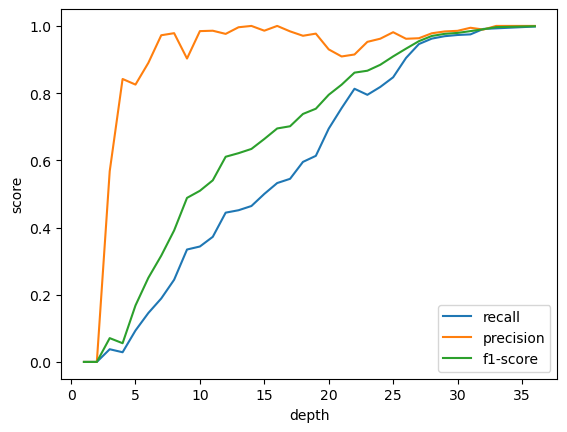

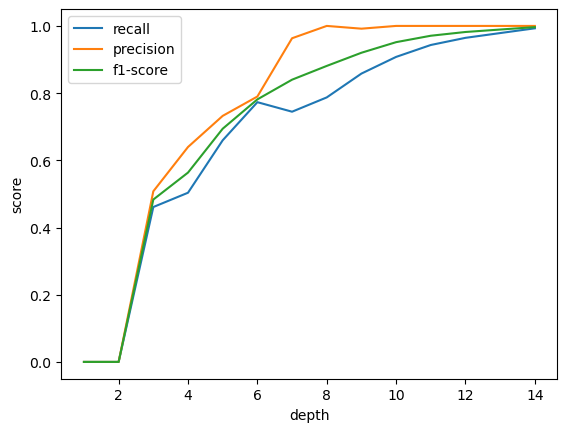

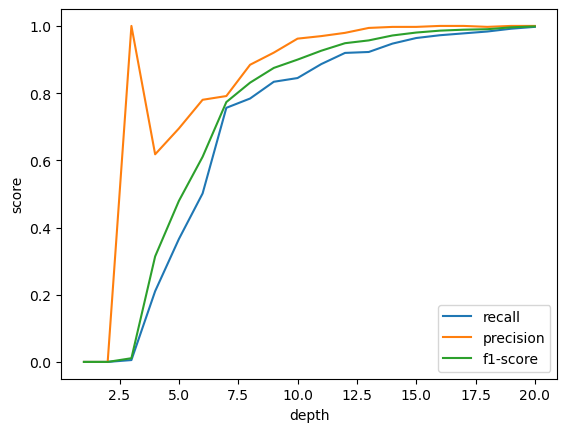

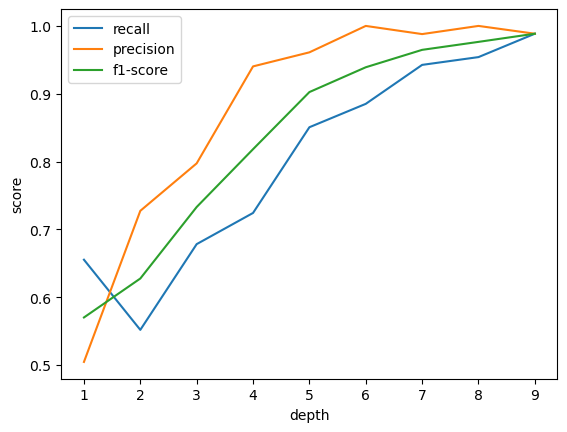

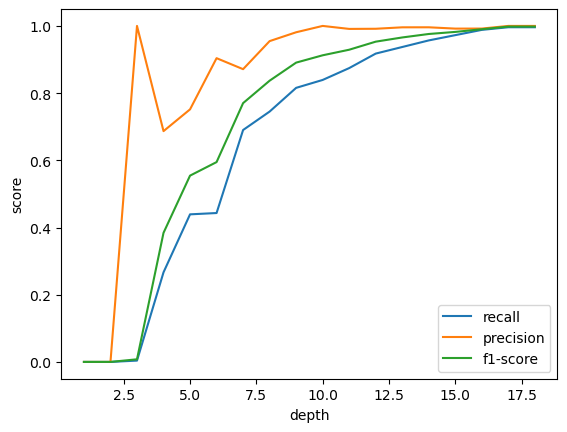

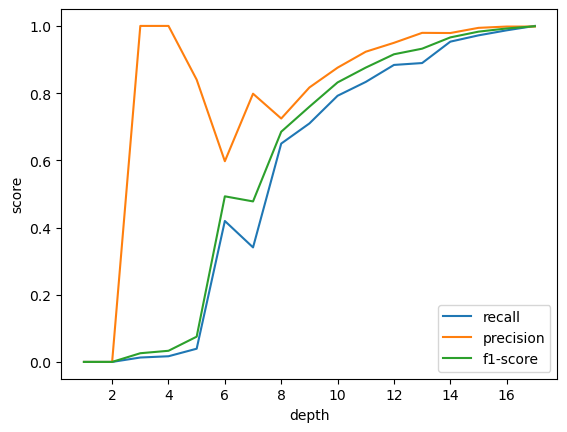

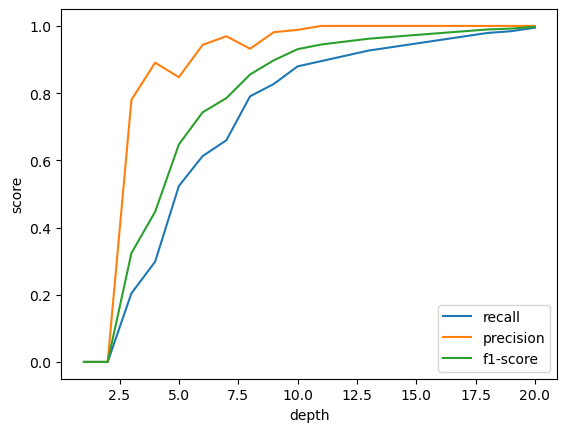

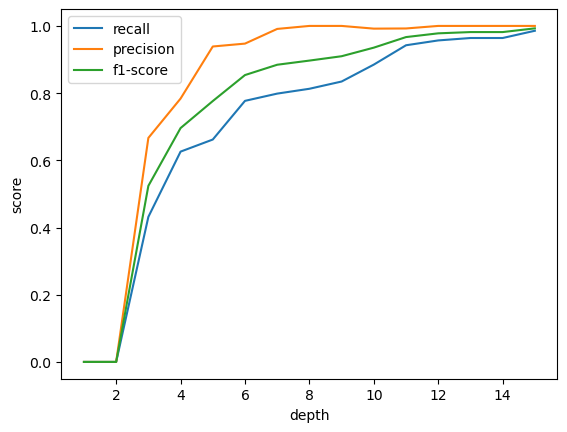

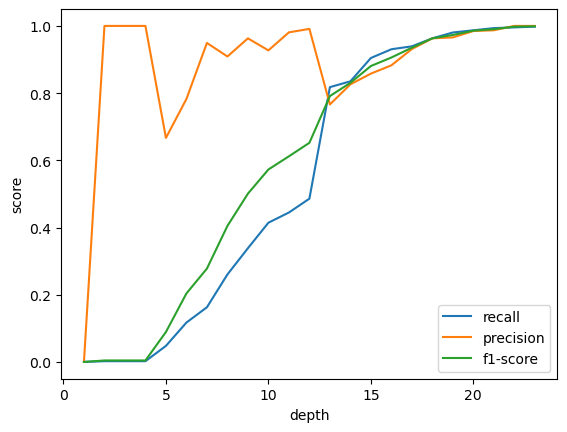

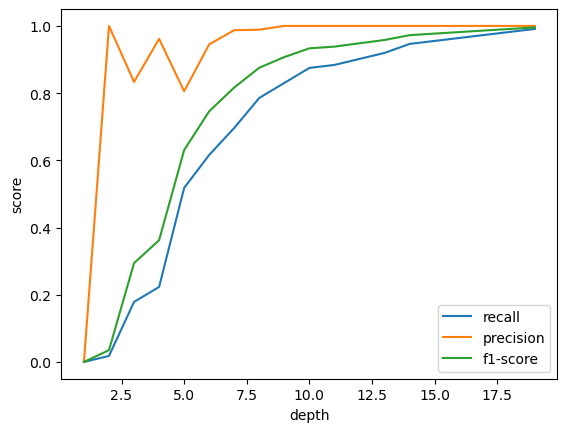

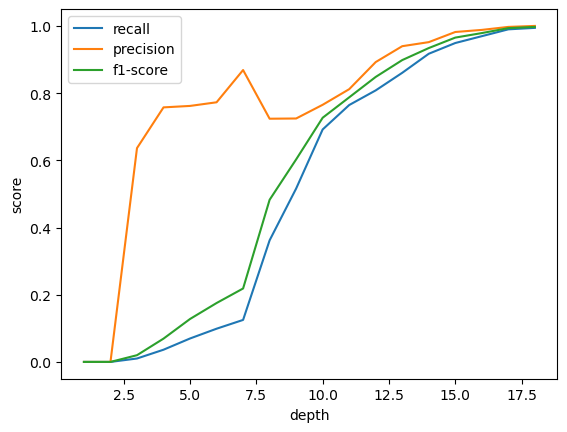

In [4]:
model = DecisionTree(pivot_df, embedding)
k = 15
result = []
for i in range(k):
    model.kmeans_target(i)
    score_list = model.get_all_depth(scoring='all')

    r_list = [] 
    p_list = []
    f_list = []

    for score in score_list:
        r_list.append(score[0]) 
        p_list.append(score[1])
        f_list.append(score[2])

    plt.plot(range(1, model.max_depth), r_list, label='recall')
    plt.plot(range(1, model.max_depth), p_list, label='precision')
    plt.plot(range(1, model.max_depth), f_list, label='f1-score')

    plt.xlabel('depth')
    plt.ylabel('score')
    plt.legend()
    # plt.hlines(y=1.0, xmin = passed_depths[-1], xmax=passed_depths[0], colors='r')
    plt.show()

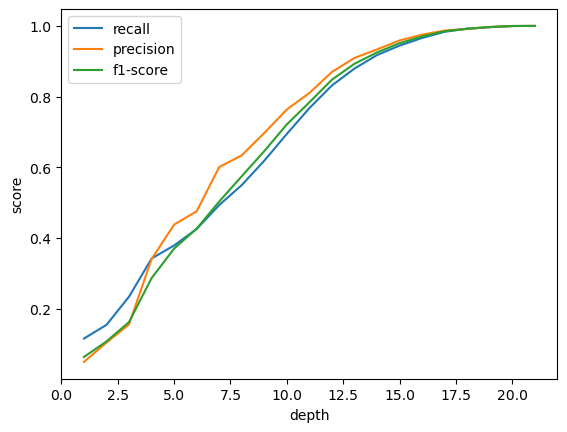

In [6]:
model = DecisionTree(pivot_df, embedding)
score_list = model.get_all_depth(scoring='all')

r_list = [] 
p_list = []
f_list = []

for score in score_list:
    r_list.append(score[0]) 
    p_list.append(score[1])
    f_list.append(score[2])

plt.plot(range(1, model.max_depth), r_list, label='recall')
plt.plot(range(1, model.max_depth), p_list, label='precision')
plt.plot(range(1, model.max_depth), f_list, label='f1-score')

plt.xlabel('depth')
plt.ylabel('score')
plt.legend()
# plt.hlines(y=1.0, xmin = passed_depths[-1], xmax=passed_depths[0], colors='r')
plt.show()